# Extracting Information from Image with LLava
This notebook shows how the model, Llava is unable to efficiently and effectively extract text from images - even images that are not noisy. 

In [1]:
from datasets import load_dataset, Image

dataset = load_dataset("nielsr/funsd", split="train")
dataset = dataset.cast_column("image", Image(mode="RGB"))

funsd.py:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

The repository for nielsr/funsd contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/nielsr/funsd.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [2]:
print(dataset)

Dataset({
    features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path', 'image'],
    num_rows: 149
})


In [3]:
print(dataset[0])

{'id': '0', 'words': ['R&D', ':', 'Suggestion:', 'Date:', 'Licensee', 'Yes', 'No', '597005708', 'R&D', 'QUALITY', 'IMPROVEMENT', 'SUGGESTION/', 'SOLUTION', 'FORM', 'Name', '/', 'Phone', 'Ext.', ':', 'M.', 'Hamann', 'P.', 'Harper,', 'P.', 'Martinez', '9/', '3/', '92', 'R&D', 'Group:', 'J.', 'S.', 'Wigand', 'Supervisor', '/', 'Manager', 'Discontinue', 'coal', 'retention', 'analyses', 'on', 'licensee', 'submitted', 'product', 'samples', '(Note', ':', 'Coal', 'Retention', 'testing', 'is', 'not', 'performed', 'by', 'most', 'licensees.', 'Other', 'B&W', 'physical', 'measurements', 'as', 'ends', 'stability', 'and', 'inspection', 'for', 'soft', 'spots', 'in', 'ciparettes', 'are', 'thought', 'to', 'be', 'sufficient', 'measures', 'to', 'assure', 'cigarette', 'physical', 'integrity.', 'The', 'proposed', 'action', 'will', 'increase', 'laboratory', 'productivity', '.', ')', 'Suggested', 'Solutions', '(s)', ':', 'Delete', 'coal', 'retention', 'from', 'the', 'list', 'of', 'standard', 'analyses', 'per

In [1]:
import os
import re

import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image

def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings
    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """
    try:
        image = Image.open(io.BytesIO(image_bytes))
        if image.mode in ("RGBA", "P"):
            image = image.convert("RGB")
        
        buffered = BytesIO()
        pil_image.save(buffered, format="JPEG")
        img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
        return img_str
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image
    :param img_base64: Base64 string
    """
    #create an HTML img tag w/ base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}"/>'
    #display the image by rendering HTML
    display(HTML(image_html))

In [ ]:
from langchain_ollama import OllamaLLM

img_dir = os.fsencode("./figures")
prompt_text = """Extract and describe the text features from the image in detail. Be specific about graphs, such as bar plots. If there is text, output the text in the exact format as what is represented in the picture."""
img_summaries = {}

img_model = OllamaLLM(model='llava:latest')
for file in os.listdir(img_dir):
    filename = os.fsdecode(file)
    base = re.split(r"\.", filename)[0]
    pil_image = Image.open(os.fsdecode(img_dir) + '/' + filename)
    image_b64 = convert_to_base64(pil_image)
    llm_with_image_context = img_model.bind(images=[image_b64])
    summary = llm_with_image_context.invoke(prompt_text)
    img_summaries[base] = summary

In [17]:
from langchain_ollama import OllamaLLM
prompt_text = """Extract and describe the text features from the image in detail. Be specific about graphs, such as bar plots. If there is text, output the text in the exact format as what is represented in the picture. Return the output as a list of words."""
prompt_text = """What is the number at the bottom right corner of the form?"""
img_summaries = {}

img_model = OllamaLLM(model='llava:latest')

filename = dataset[1]['image_path']
pil_image = Image.open(filename)
image_b64 = convert_to_base64(pil_image)
llm_with_image_content = img_model.bind(images=[image_b64])
summary = llm_with_image_content.invoke(prompt_text)
print(summary)


 The image you provided appears to be a form or document with various sections filled out. There's text and numbers that seem to represent information about a flight, such as the flight number, origin and destination cities, departure and arrival times, weight in pounds of cargo, fuel used, and other details related to air travel.

At the bottom right corner of the form, there is a sequence of numbers: 1002490791. This could be a reference number for the flight or the document itself. It's important to note that without additional context, it's difficult to provide more specific information about this number. 


In [13]:
print(dataset[1]['image_path'])

/home/grad6/ttran/.cache/huggingface/datasets/downloads/extracted/575278d89728249a90946e2e7c4b9b73410bc8a3af53807cb0ec8247c9d1c56d/dataset/training_data/images/0000989556.png



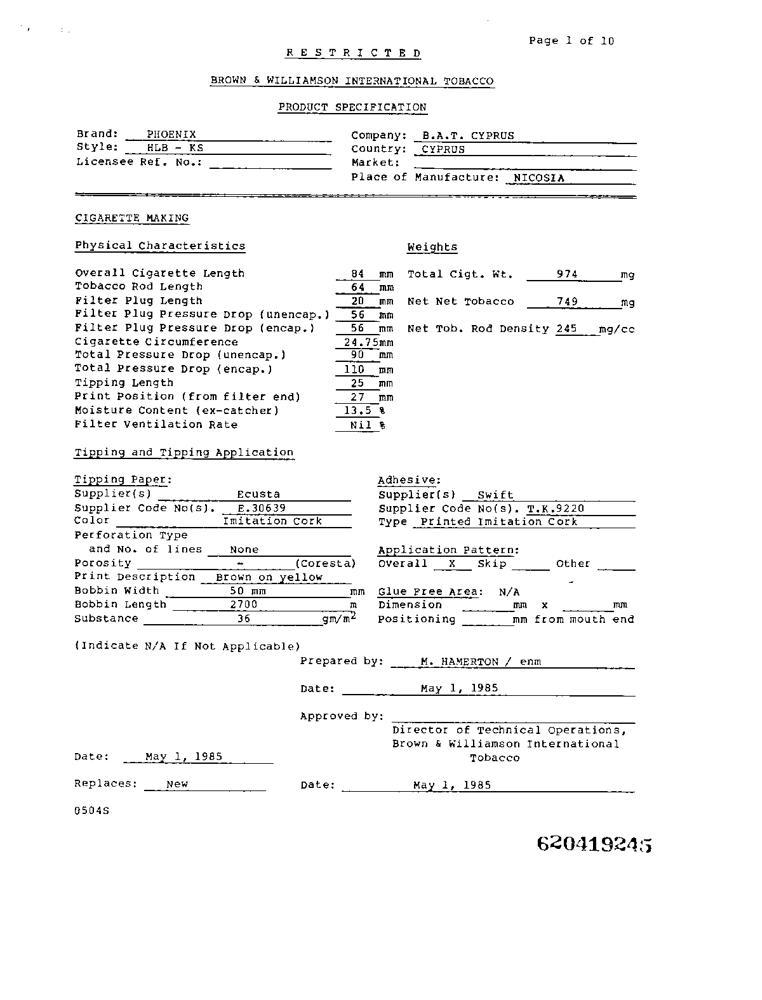

In [12]:
plt_img_base64(image_b64)

In [21]:
dataset = load_dataset('lmms-lab/DocVQA', 'DocVQA')
# dataset = dataset.cast_column("image", Image(mode="RGB"))

KeyError: "Invalid key: 0. Please first select a split. For example: `my_dataset_dictionary['test'][0]`. Available splits: ['test', 'validation']"

In [43]:
train_data = dataset['test']
test_data = dataset['validation']
# train_data = train_data.cast_column("image", Image(mode="RGB"))
# test_data = test_data.cast_column("image", Image(mode="RGB"))
print(test_data[5000])

{'questionId': '65066', 'question': 'What type of data is it?', 'question_types': ['layout'], 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=1687x2183 at 0x7FE0AABD7F70>, 'docId': 10682, 'ucsf_document_id': 'kxvh0227', 'ucsf_document_page_no': '2', 'answers': ['preliminary data', 'Preliminary data'], 'data_split': 'val'}


 The image shows a document with text and bullet points that pertain to meetings and attendance in a company. However, there is no specific information provided about the frequency of board meetings based on the company's governance policy. 
How many times the Board is required to meet, as per Company's Governance Policy based on "Meetings and Attendance"?



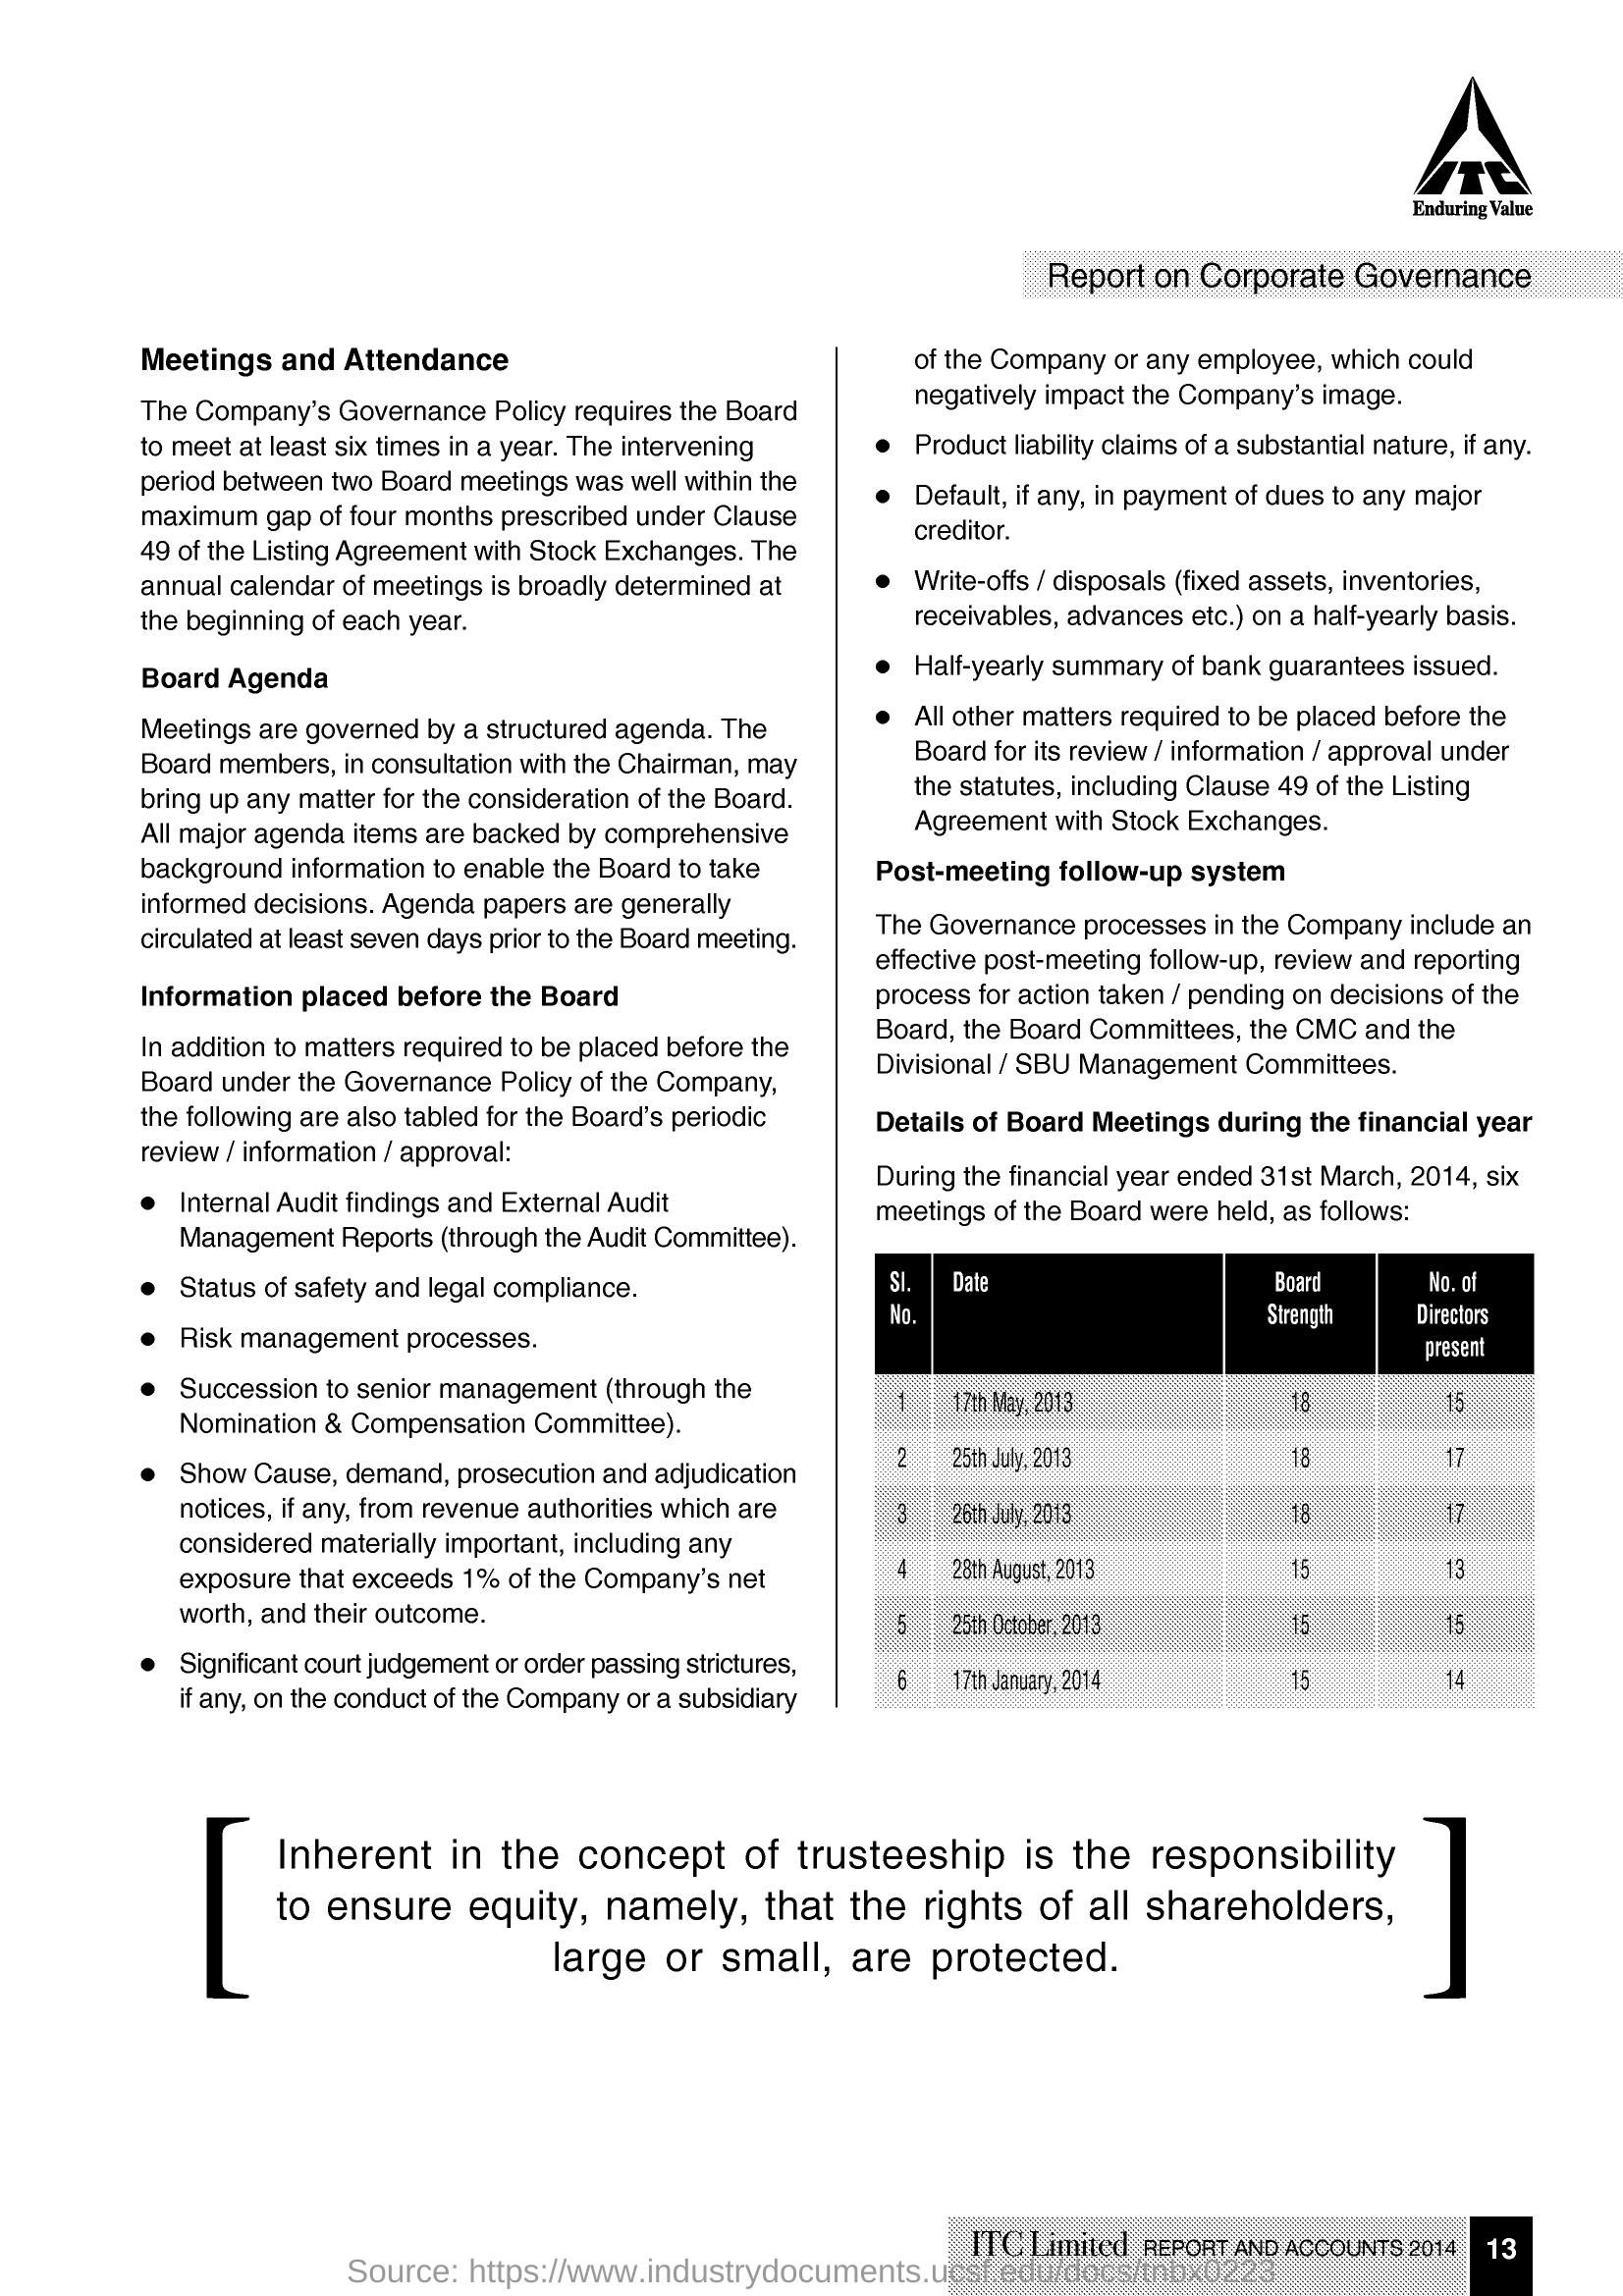

In [38]:
pil_image = train_data[150]['image']

prompt_text = train_data[150]['question']
image_b64 = convert_to_base64(pil_image)
llm_with_image_content = img_model.bind(images=[image_b64])
summary = llm_with_image_content.invoke(prompt_text)

print(summary)
print(prompt_text)
plt_img_base64(image_b64)